In [95]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [125]:
data = pd.read_csv("cleanData.csv")

data = data.drop("Place Name_x", 1)

data["Male persons age under 5 years"] = data["Male persons age under 5 years"].replace("...", np.nan)

data = data.dropna()

agedata = data.loc[:,"Total persons": "Female persons age 75 and over"]
agedata["AveragePrice"] = data.iloc[:,104]




In [126]:
agedata
#agedata["AveragePrice"] = agedata["AveragePrice"].str.replace("$","")
#agedata["AveragePrice"] = agedata["AveragePrice"].replace("0.00",np.nan)
#agedata["AveragePrice"] = agedata["AveragePrice"].str.replace(",","")
#agedata["AveragePrice"] = agedata["AveragePrice"].str.replace(".00","")
#agedata["AveragePrice"] = agedata["AveragePrice"].replace("...",np.nan)
#agedata["AveragePrice"] = agedata["AveragePrice"].replace(" ... ",np.nan)

#agedata = agedata.dropna()

for col in agedata:
    agedata[col] = agedata[col].str.replace("$","")
    agedata[col] = agedata[col].str.replace(",","")
    #agedata[col] = agedata[col].str.replace(".00","")
    agedata[col] = agedata[col].replace("...", np.nan)
    agedata[col] = agedata[col].replace(" ... ", np.nan)
    agedata[col] = agedata[col].replace(" -   ", np.nan)
    agedata[col] = agedata[col].replace("", np.nan)
    agedata = agedata.dropna()
    agedata[col] = agedata[col].astype(str).astype(float)

#agedata.to_csv("extracleanData.csv", encoding='utf-8')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


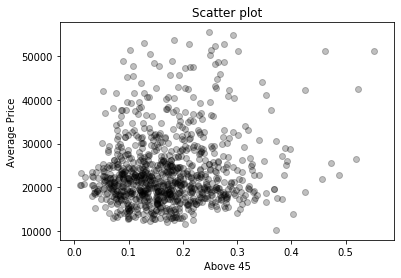

In [128]:

agedata["femaleAbove45"] = (agedata["Female persons age 45-54 years"] + agedata["Female persons age 55-59 years"] + agedata["Female persons age 60-61 years"] + agedata["Female persons age 62-64 years"] + agedata["Female persons age 65-74 years"] + agedata["Female persons age 75 and over"]) / (agedata["Total persons"])

agedata


colors = (0,0,0)

plt.scatter(agedata["femaleAbove45"], agedata["AveragePrice"], c=colors, alpha=0.25)
plt.title('Scatter plot')
plt.xlabel('Above 45')
plt.ylabel('Average Price')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


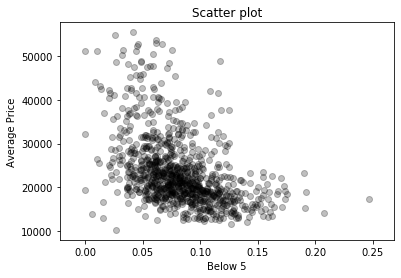

In [129]:
agedata["malebelow16"] = (agedata["Male persons age under 5 years"] + agedata["Male persons age 5 years"] + agedata["Male persons age 6 years"] + agedata["Male persons age 7-9 years"] + agedata["Male persons age 10-13 years"] + agedata["Male persons age 14 years"] + agedata["Male persons age 15 years"] + agedata["Male persons age 16 years"]) / (agedata["Total persons"])
agedata["under5"] = (agedata["Male persons age under 5 years"] + agedata["Female persons age under 5 years"]) / (agedata["Total persons"])

colors = (0,0,0)

plt.scatter(agedata["under5"], agedata["AveragePrice"], c=colors, alpha=0.25)
plt.title('Scatter plot')
plt.xlabel('Below 5')
plt.ylabel('Average Price')
plt.show()




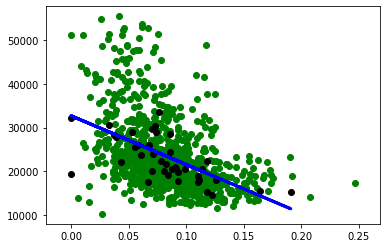

Coefficients: 
 [-111544.368386]
Mean squared error: 16358181.59
Coefficient of determination: 0.36


In [133]:
under5data = pd.DataFrame()

under5data["under5"] = agedata["under5"]
under5data["AveragePrice"] = agedata["AveragePrice"]

under5data

#Convert to numpy array

X = under5data["under5"].values
X = X.reshape(-1, 1)

Y = under5data["AveragePrice"].values

# Split the data into training/testing sets
X_train = X[:-40]
X_test = X[-40:]

# Split the targets into training/testing sets
Y_train = Y[:-40]
Y_test = Y[-40:]

#X_train

regr = linear_model.LinearRegression()



# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = regr.predict(X_test)

# Plot outputs
plt.scatter(X_train, Y_train, color = "green")
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))
